# Week3授業課題 信用情報の分析

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

Home Creditはどのような企業？  
このコンペティションでは何を予測する？  
それを予測することで企業が得られるメリットは何？

<pre>
Home Creditはどのような企業？
　HomeCreditとは、１９９７年にチェコで創設された金融機関である。
　アメリカ、ロシア、中国、インドを含む１４国で活動している。
　その活動は十分な返済経験がなく借り入れが困難な人に対して注力されている。

このコンペティションでは何を予測する？
　顧客のデータから返済する確率を予測する。
　結果はROC曲線のAUCの値を持って評価する。

それを予測することで企業が得られるメリットは何？
　貸手はより安心してお金を貸すことができる。  
　借り手は借りることができる人の幅が広がる可能性がある。


In [6]:
# データのロード
data = pd.read_csv("application_train.csv")

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。  

.head()、.info()、describe()などを使う  
欠損値の有無を見る  
クラスごとのデータ数をグラフに出す  
それぞれ結果に対する説明や考察も行ってください。

In [34]:
display(data.head())
print("特徴量が１２２個ある。\nTARGETは０と１で入力されている")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


特徴量が１２２個ある。
TARGETは０と１で入力されている


In [33]:
display(data.info())
print("DataFrameとして保存されている \nFloat, int, objectタイプが存在している")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

DataFrameとして保存されている 
Float, int, objectタイプが存在している


In [35]:
display(data.describe())
print("それぞれの特徴量の平均値などがわかる\n６個ここに記載はない")

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


それぞれの特徴量の平均値などがわかる
６個ここに記載はない


In [42]:
#欠損値の確認　欠損率も算出

missing_feature = ["missing", "missing rate"]
kesson_table = data.isnull().sum()
kesson_table_ren = kesson_table / len(data) * 100
kesson_table_df = pd.concat([kesson_table, kesson_table_ren], axis=1)
kesson_table_df.columns = missing_feature
kesson_table_df.head()

,missing,missing rate
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0


Text(0, 0.5, 'number of data')

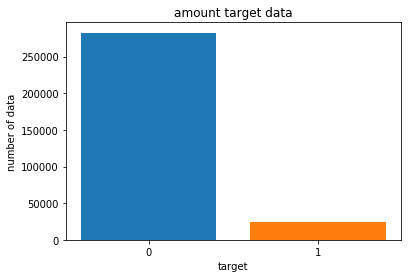

In [43]:
#ターゲットごとにデータを分け、それぞれのサンプル数をグラフで表示

data_0 = data[data["TARGET"] == 0]
data_1 = data[data["TARGET"] == 1]

data_0_num = len(data_0)
data_1_num = len(data_1)

plt.bar("0", data_0_num)
plt.bar("1", data_1_num)
plt.title("amount target data")
plt.xlabel("target")
plt.ylabel("number of data")

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

<pre>
まず、大雑把ではあるがそれぞれのターゲットに対する相関係数をみる
そしてその中で相関が高かったものを選出しグラフで可視化する

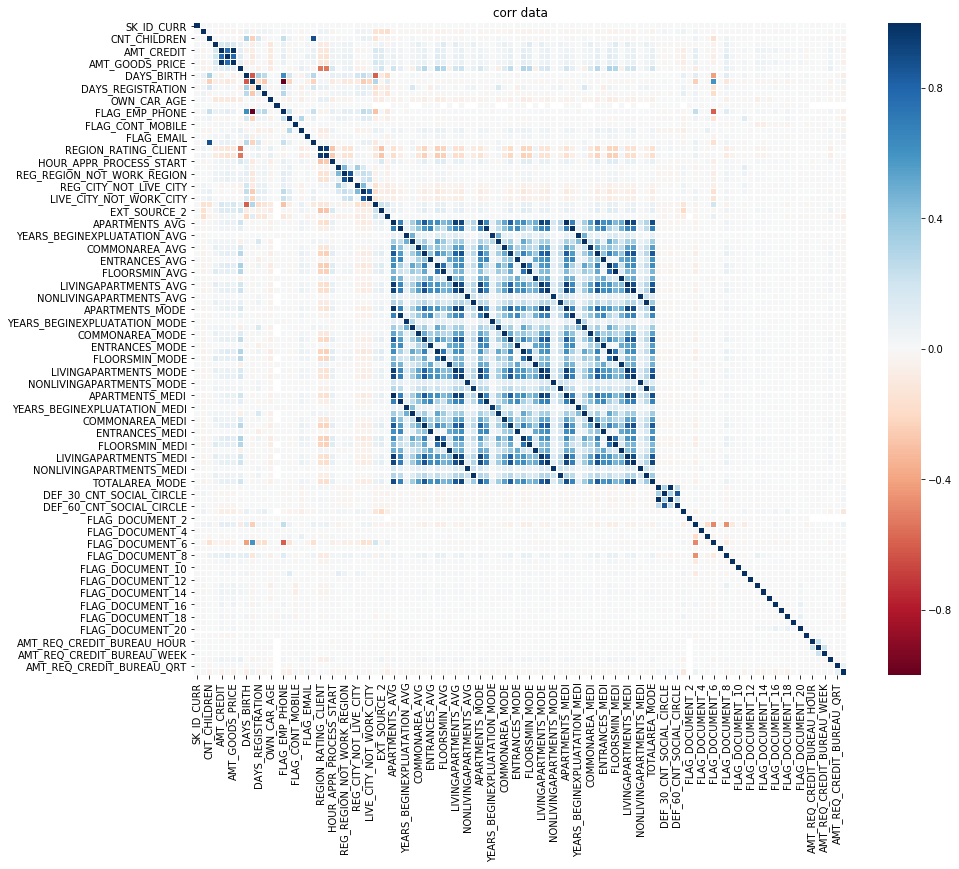

In [41]:
#相関行列を作り、ヒートマップで可視化する
data_corr = data.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(15, 12))
plt.title("corr data")
sns.heatmap(data_corr, linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white", annot=False)
plt.show()

In [46]:
#相関が高いものを上と下それぞれ１０個ずつ抽出し、特徴量の名前を使いターゲットごとに抽出する

data_corr_target = data_corr["TARGET"].sort_values(ascending=False)
data_corr_mix = pd.concat([data_corr_target[1:11], data_corr_target[-11:-1]], axis=0)

data_index = data_corr_mix.index        #特徴量の名前を抜き出しておく

new_data_0 = data_0[data_index]
new_data_1 = data_1[data_index]

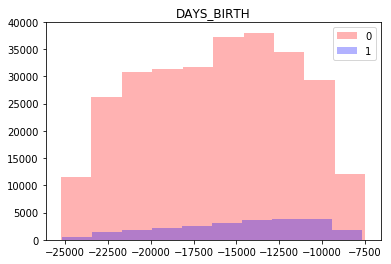

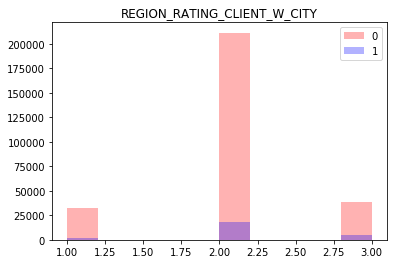

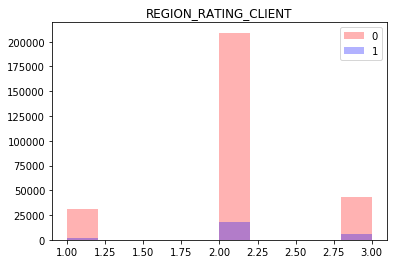

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


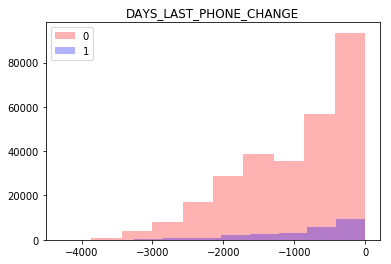

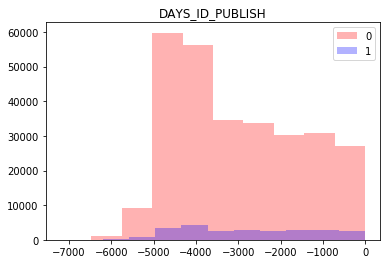

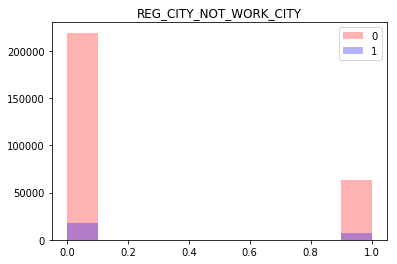

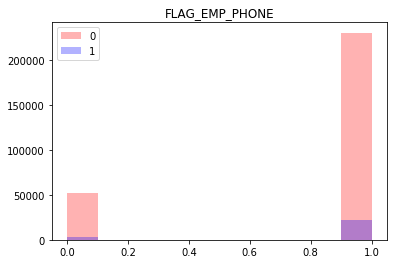

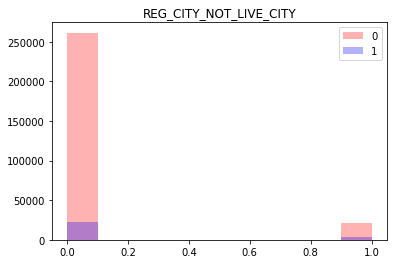

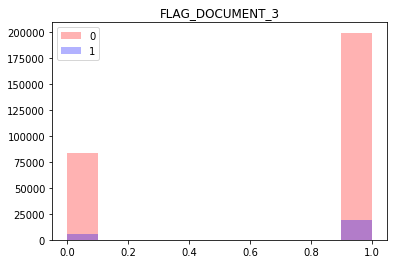

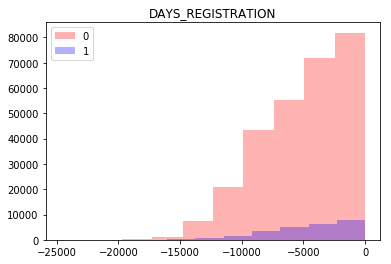

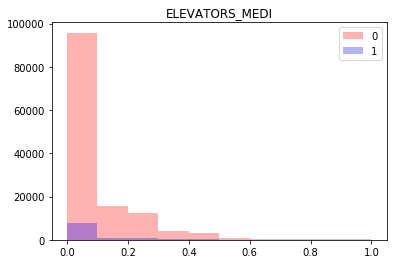

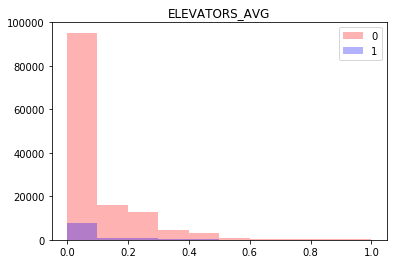

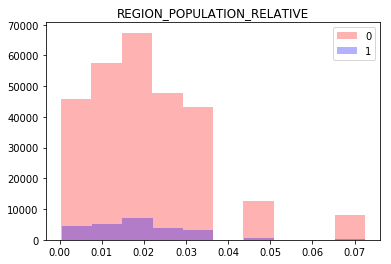

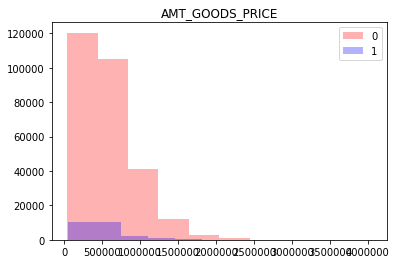

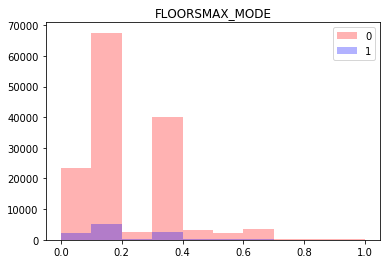

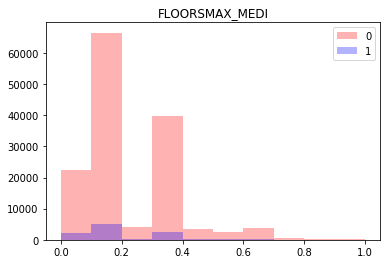

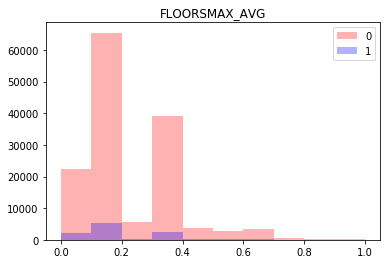

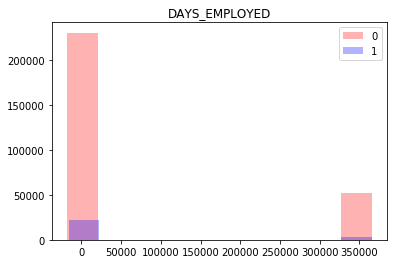

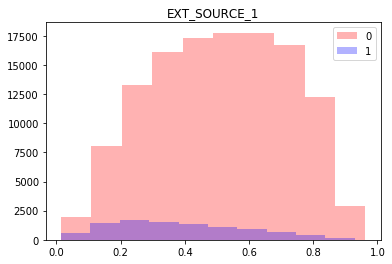

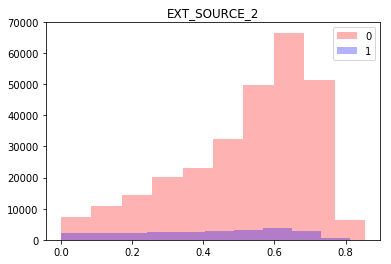

In [47]:
for index in data_index:
    plt.title(index)
    plt.hist(new_data_0[index], alpha=0.3, color="red", label="0")
    plt.hist(new_data_1[index], alpha=0.3, color="blue", label="1")
    plt.legend()
    plt.show()

<pre>
相関が高いそうな２０個の特徴量をそれぞれグラフにし、０と１で差を見てみたが二つの特徴量
DAY_BIRTH   EXT_SOURCE_1　  EXT_SOURCE_2以外はあまり変化がなさそうである 

そこで上記の三つ以外を勘で13個選び０と１で比較してみる  

DAYS_BIRTH  
EXT_SOURCE_1  
EXT_SOURCE_2  
CNT_CHILDREN:子供の数が多いと支出も多くなり返済が困難になるのではないかと考えた  
AMT_INCOME_TOTAL:年収が低ければ返済は困難であると考えた  
NAME_INCOME_TYPE:上記と似ているが収入のタイプによって大まかな額がわかるので  
NAME_EDUCATION_TYPE:教育レベルが高ければ返済する傾向にあると仮定した  
OCCUPATION_TYPE:職種は人を表す指標になり得ると考えているので、職種が返済能力に影響を与えると仮定した  
REGION_RATING_CLIENT_W_CITY:住んでいるところは治安や周りの人の影響を受けるのでその人の考え方影響し、返済能力とも関係があると仮定した
AMT_REQ_CREDIT_BUREAU_HOUR:信用情報を管理しているクレジットビューローからの問い合わせはその人の過去の情報を表していると仮定した
AMT_REQ_CREDIT_BUREAU_WEEK:一週間でも比較し期間が関係しているか確認する   
APARTMENTS_AVG:家の広さの平均はその人の生活レベルを示していると仮定した  
ORGANIZATION_TYPE:所属組織はその人への影響を与えると考え、返済能力にも影響すると仮定した  
HOUR_APPR_PROCESS_START:申し込み時間に余裕を持つタイプなのかどうかの指標と考えた  
FLAG_EMAIL:この時代でメールを使えない人は収入などに差があるのではと考察した  

上記の特徴量について再度グラフ化し差をみてみる  
カテゴリーデータの場合は別途可視化する

In [48]:
#欠損値の処理　　ここでは欠損値があればすべで削除した
data_0_dr = data_0.dropna()
data_1_dr = data_1.dropna()

In [49]:
#勘で選んだものを含めて再度特徴量を抜き出した
manual_choice_colums = ["DAYS_BIRTH", "EXT_SOURCE_1","EXT_SOURCE_2", "CNT_CHILDREN","AMT_INCOME_TOTAL",
                     "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "OCCUPATION_TYPE", "REGION_RATING_CLIENT_W_CITY",
                     "AMT_REQ_CREDIT_BUREAU_HOUR",  "AMT_REQ_CREDIT_BUREAU_WEEK","APARTMENTS_AVG",
                     "ORGANIZATION_TYPE", "HOUR_APPR_PROCESS_START", "FLAG_EMAIL" ]

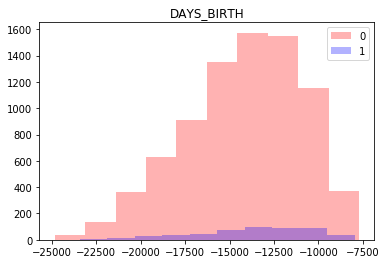

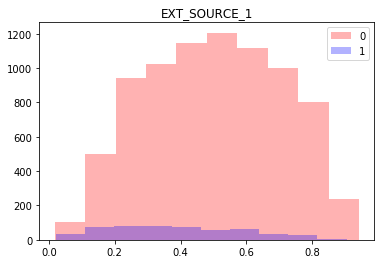

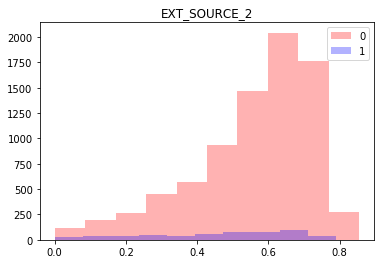

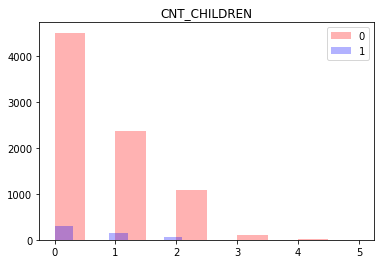

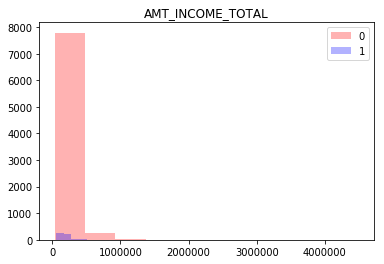

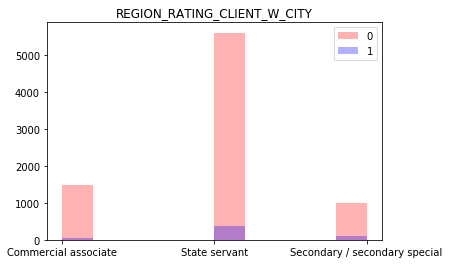

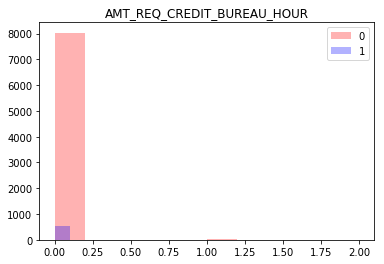

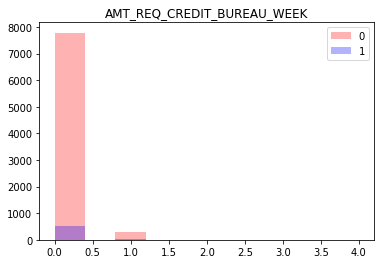

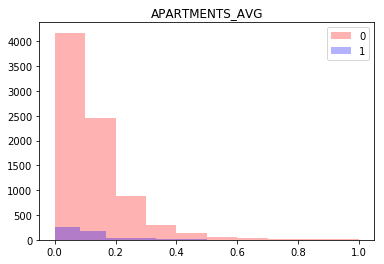

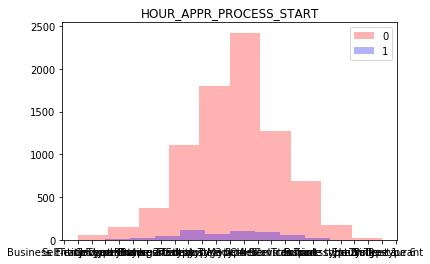

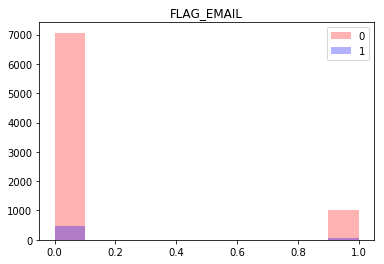

In [50]:
#それぞれグラフに表示　カテゴリーデータの場合はリストに加える処理をした
miss_colum = []
for index in manual_choice_colums:
    try:
        plt.title(index)
        plt.hist(data_0_dr[index], alpha=0.3, color="red", label="0")
        plt.hist(data_1_dr[index], alpha=0.3, color="blue", label="1")
        plt.legend()
        plt.show()
    except:
        miss_colum.append(index)

<pre>
綺麗に分けられている訳ではないが、最初に出した特徴量以外はあまりターゲットによるさがなさそうである
もともと総数が違うので割合で比較する方が良さそうである
やはり勘に頼るのはよくない

続いてカテゴリーデータを処理する

In [52]:
#グラフ化できなかったものを表示
miss_colum

['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [57]:
# ターゲットのごとに、miss_columに含まれるデータを　{カテゴリー名：カテゴリーの総数}　の形で抜きだす

add_dic_0 = {}
for i in miss_colum:
    for j in data_0_dr[i].unique():
        add_dic_0[j] = len(data_0_dr[data_0_dr[i] == j])
        
add_dic_1 = {}
for i in miss_colum:
    for j in data_1_dr[i].unique():
        add_dic_1[j] = len(data_1_dr[data_1_dr[i] == j])
        

In [59]:
#上記の辞書からそれぞれの特徴量のみを抜きだす。その後ソートをして名前順を揃える

Name_income_dict_0 = {}
for i in data_0_dr['NAME_INCOME_TYPE'].unique():
    for j in add_dic_0.keys():
        if i == j:
            Name_income_dict_0[j] = len(data_0_dr[data_0_dr['NAME_INCOME_TYPE'] == j])
Name_income_dict_0 = sorted(Name_income_dict_0.items())

Name_income_dict_1 = {}
for i in data_1_dr['NAME_INCOME_TYPE'].unique():
    for j in add_dic_1.keys():
        if i == j:
            Name_income_dict_1[j] = len(data_1_dr[data_1_dr['NAME_INCOME_TYPE'] == j])
Name_income_dict_1 = sorted(Name_income_dict_1.items())


In [60]:
Name_ed_dict_0 = {}
for i in data_0_dr['NAME_EDUCATION_TYPE'].unique():
    for j in add_dic_0.keys():
        if i == j:
            Name_ed_dict_0[j] = len(data_0_dr[data_0_dr['NAME_EDUCATION_TYPE'] == j])
Name_ed_dict_0 = sorted(Name_ed_dict_0.items())

Name_ed_dict_1 = {}
for i in data_1_dr['NAME_EDUCATION_TYPE'].unique():
    for j in add_dic_1.keys():
        if i == j:
            Name_ed_dict_1[j] = len(data_1_dr[data_1_dr['NAME_EDUCATION_TYPE'] == j])
Name_ed_dict_1 = sorted(Name_ed_dict_1.items())

In [61]:
Oc_ty_dict_0 = {}
for i in data_0_dr['OCCUPATION_TYPE'].unique():
    for j in add_dic_0.keys():
        if i == j:
            Oc_ty_dict_0[j] = len(data_0_dr[data_0_dr['OCCUPATION_TYPE'] == j])
Oc_ty_dict_0 = sorted(Oc_ty_dict_0.items())

Oc_ty_dict_1 = {}
for i in data_1_dr['OCCUPATION_TYPE'].unique():
    for j in add_dic_1.keys():
        if i == j:
            Oc_ty_dict_1[j] = len(data_1_dr[data_1_dr['OCCUPATION_TYPE'] == j])
Oc_ty_dict_1 = sorted(Oc_ty_dict_1.items())

In [62]:
Or_ty_dict_0 = {}
for i in data_0_dr['ORGANIZATION_TYPE'].unique():
    for j in add_dic_0.keys():
        if i == j:
            Or_ty_dict_0[j] = len(data_0_dr[data_0_dr['ORGANIZATION_TYPE'] == j])
Or_ty_dict_0 = sorted(Or_ty_dict_0.items())

Or_ty_dict_1 = {}
for i in data_1_dr['ORGANIZATION_TYPE'].unique():
    for j in add_dic_1.keys():
        if i == j:
            Or_ty_dict_1[j] = len(data_1_dr[data_1_dr['ORGANIZATION_TYPE'] == j])
Or_ty_dict_1 = sorted(Or_ty_dict_1.items())

<pre>
それぞれのデータをグラフにする

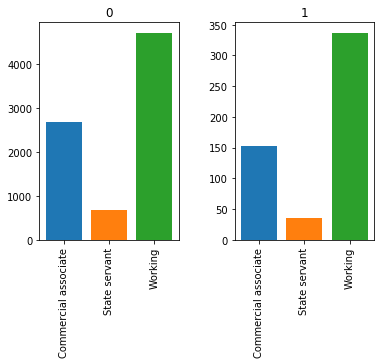

In [63]:
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.rcParams["font.size"] = 10

plt.subplot(1,2,1)
for i, j in Name_income_dict_0:
    plt.title("0")
    plt.bar(i, j)
    plt.xticks(rotation=90)
plt.subplot(1,2,2)
for i, j in Name_income_dict_1:
    plt.title("1")
    plt.bar(i, j)
    plt.xticks(rotation=90)

plt.show()

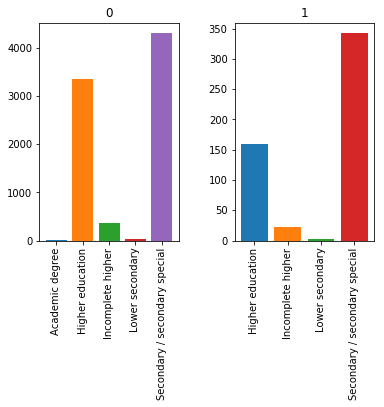

In [64]:
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.rcParams["font.size"] = 10

plt.subplot(1,2,1)
for i, j in Name_ed_dict_0:
    plt.title("0")
    plt.bar(i, j)
    plt.xticks(rotation=90)
plt.subplot(1,2,2)
for i, j in Name_ed_dict_1:
    plt.title("1")
    plt.bar(i, j)
    plt.xticks(rotation=90)

plt.show()

<pre>
Academic degreeの人は返済能力が低そうである

<Figure size 432x288 with 0 Axes>

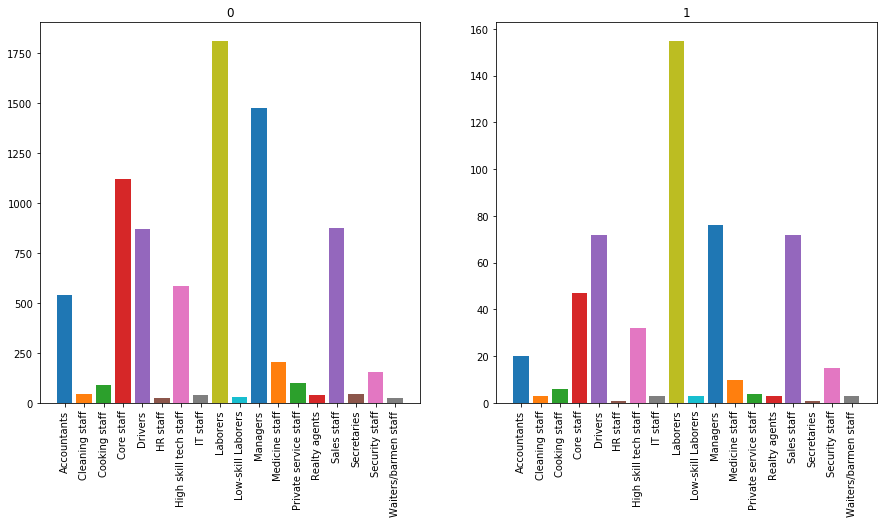

In [65]:
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.rcParams["font.size"] = 10
plt.subplots(figsize=(15,7))
plt.subplot(1,2,1)
for i, j in Oc_ty_dict_0:
    plt.title("0")
    plt.bar(i, j)
    plt.xticks(rotation=90)
plt.subplot(1,2,2)
for i, j in Oc_ty_dict_1:
    plt.title("1")
    plt.bar(i, j)
    plt.xticks(rotation=90)

plt.show()

<Figure size 432x288 with 0 Axes>

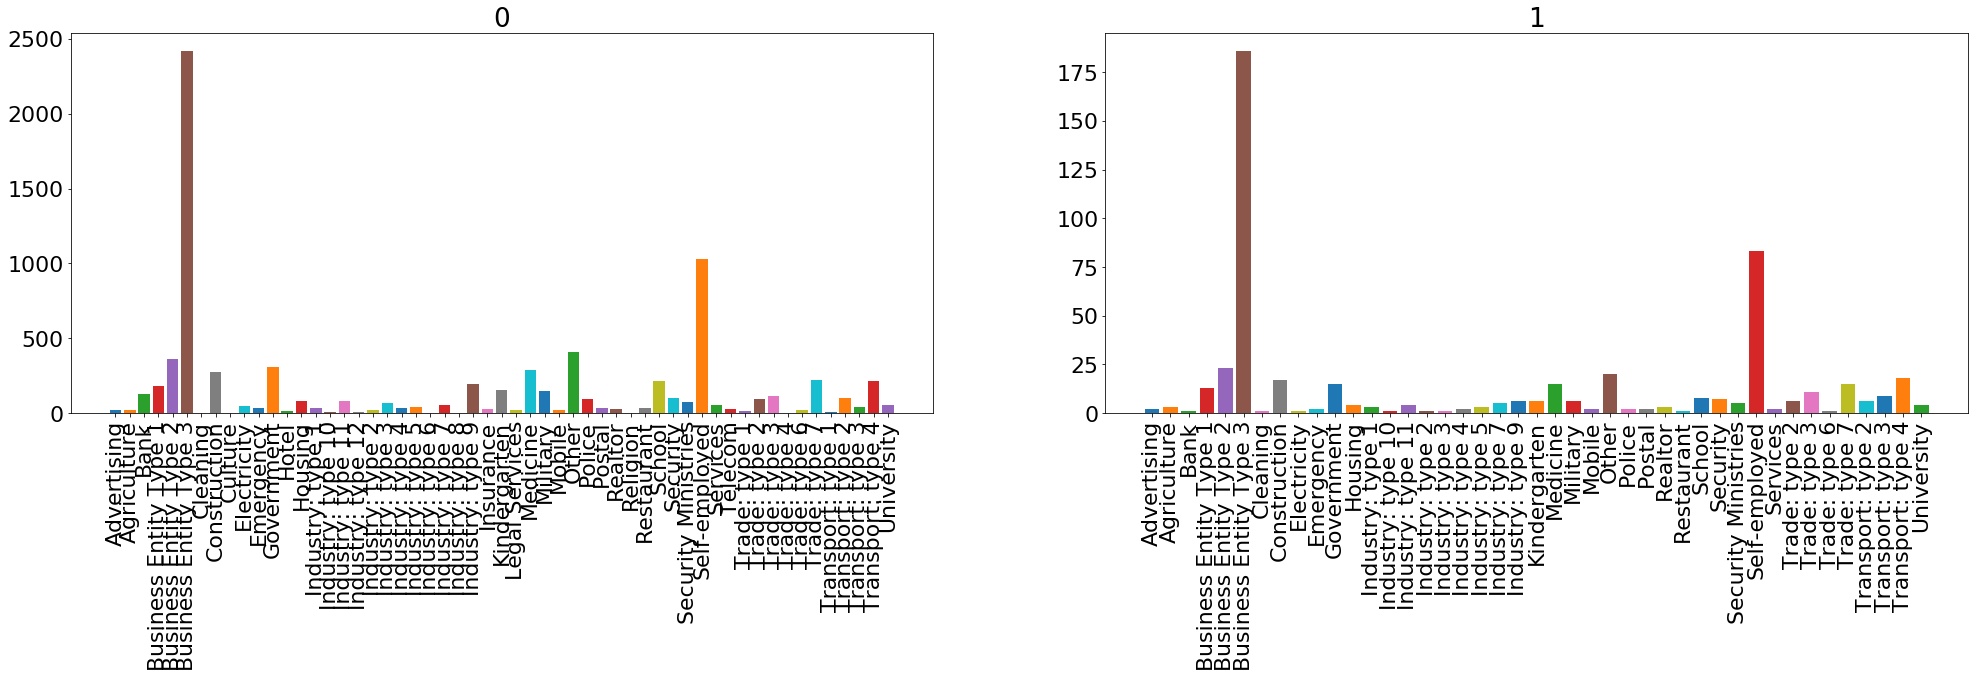

In [66]:
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.rcParams["font.size"] = 22
plt.subplots(figsize=(34,7))
plt.subplot(1,2,1)
for i, j in Or_ty_dict_0:
    plt.title("0")
    plt.bar(i, j)
    plt.xticks(rotation=90)
plt.subplot(1,2,2)
for i, j in Or_ty_dict_1:
    plt.title("1")
    plt.bar(i, j)
    plt.xticks(rotation=90)

plt.show()

<pre>
まとめ

今回は相関係数から導いた"DAYS_BIRTH", "EXT_SOURCE_1","EXT_SOURCE_2"がターゲットによって分布が異なりそうである。
さらに勘で導いたものの中では最終学歴がacademic degreeの人は返済能力が低そうである

しかし全体的にこのままではあまり差をみることが難しそうである
特にターゲットの総数が異なるため割合でみるか標準化する必要がありそうである。
特徴量をそのまま見るだけでは不十分であることを改めて理解した。